# How is Machine Learning Performed?

1. Import libraries
2. a. Load dataset - Importing pre-existing datasets.
2. b. Impute (handle) missing values - We can drop incomplete data or add some special value to create a complete dataset.
3. *Exploratory Data Analysis - This is where data visualisation (Getting mean, median, mode, etc.) occurs. We try to understand and visualise the dataset.
4. *Feature engineering - Making better and more filtered data out of existing data. Used to create more accurate (concentrated) data.
5. Model Building - Selecting and working on an ML algorithm.
6. Evaluation - Checking accuracy of the model.
7. Hyperparameter Tuning (Optional) - Optimising the coding parameters to yield best results.

*Most important parts of ML. Helps in deciding the ML model. This is why we need data scientists.

# Importing Libraries

In [1]:
#4 basic libraries:
import numpy as np #arrays functions
import pandas as pd #statistical analysis
import matplotlib.pyplot as plt #data visualisation (graphs and plots; built on R)
import seaborn as sns #data visualisation (numpy:pandas::pyplot:seaborn)

%matplotlib inline

In [2]:
# Load dataset
df = sns.load_dataset('iris')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [3]:
df['sepal_width'].describe()

count    150.000000
mean       3.057333
std        0.435866
min        2.000000
25%        2.800000
50%        3.000000
75%        3.300000
max        4.400000
Name: sepal_width, dtype: float64

# Exploratory Data Analysis

In [4]:
# Check and impute null values (if any)
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [5]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


C:\Users\hites\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='species', ylabel='count'>

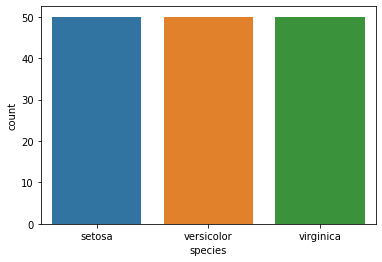

In [6]:
sns.countplot(df['species'])

In [7]:
p = df['sepal_length'].unique()
p.sort()
p

array([4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2, 5.3, 5.4, 5.5,
       5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8,
       6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.6, 7.7, 7.9])

C:\Users\hites\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='petal_length', ylabel='Density'>

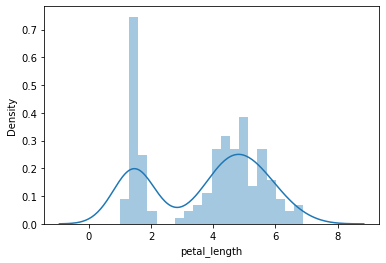

In [8]:
sns.distplot(df["petal_length"], bins=20)

A double bell-shaped curve suggests a bi-modal distribution. Since there are 2 modes, scaling is a little harder to achieve. In any case, a bi-modal distribution suggests that our data is more concentrated in 2 different areas.

C:\Users\hites\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='petal_width', ylabel='Density'>

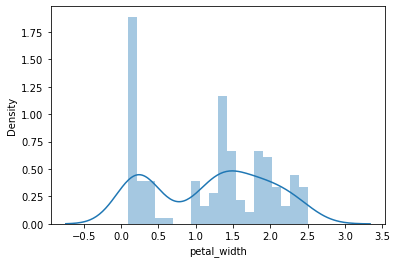

In [9]:
sns.distplot(df["petal_width"],bins=20)

We can have a similar inference from this graph as well.

C:\Users\hites\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sepal_length', ylabel='Density'>

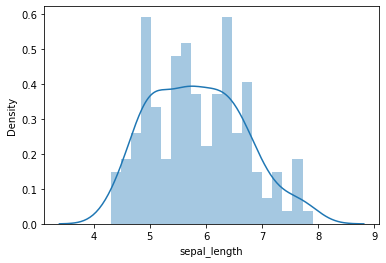

In [10]:
sns.distplot(df["sepal_length"], bins=20)

This is a better distributed attribute.

C:\Users\hites\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sepal_width', ylabel='Density'>

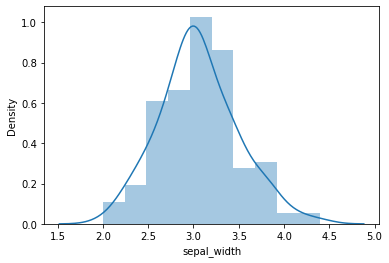

In [11]:
sns.distplot(df["sepal_width"],bins=10)

This is almost a perfect normal distribution.

<AxesSubplot:>

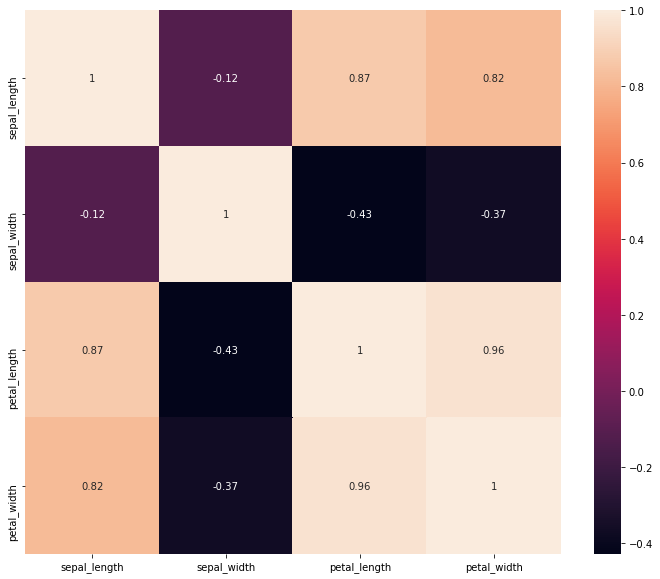

In [12]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True)

Petal length >> Petal width\
Sepal length >> Petal length\
Sepal length >> Petal width\
Are all co-related. The perfectly distributed sepal width is not corelated too well and is this less useful.

C:\Users\hites\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sepal_length', ylabel='petal_width'>

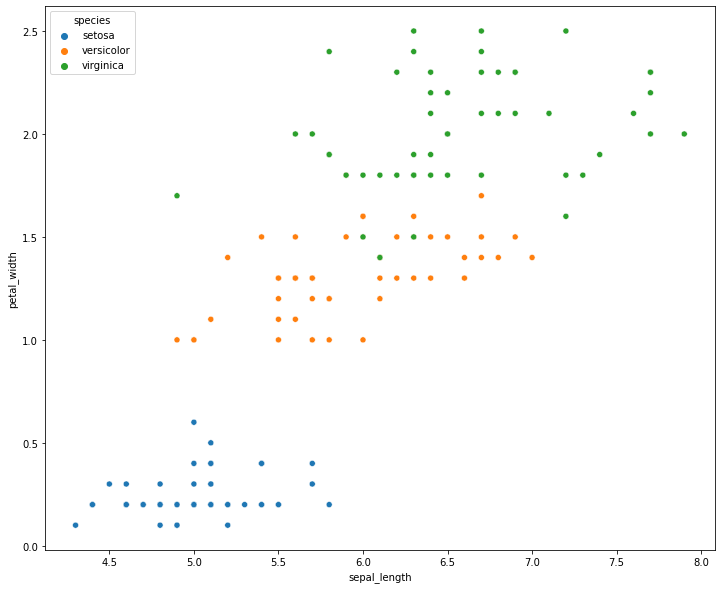

In [13]:
plt.figure(figsize=(12,10))
sns.scatterplot(df['sepal_length'],df['petal_width'], hue=df['species'])

C:\Users\hites\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sepal_length', ylabel='petal_length'>

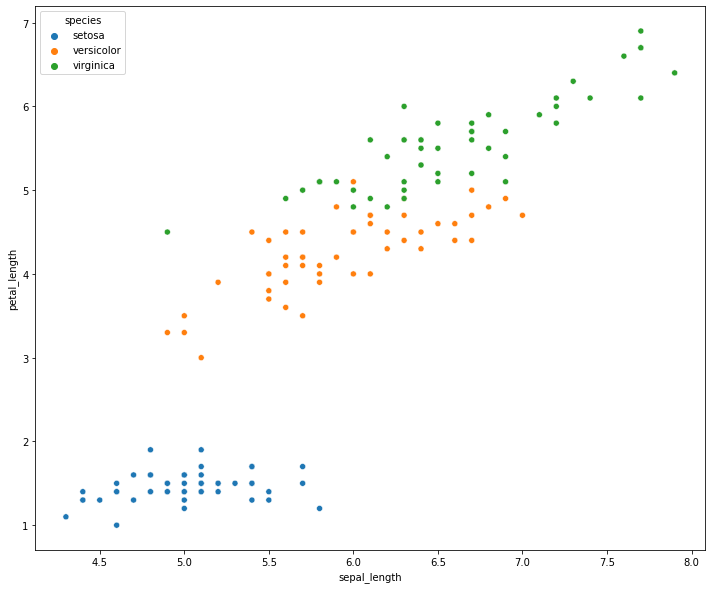

In [14]:
plt.figure(figsize=(12,10))
sns.scatterplot(df['sepal_length'],df['petal_length'], hue=df['species'])

We can conclude that setosa species has a very low petal length and width.

C:\Users\hites\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

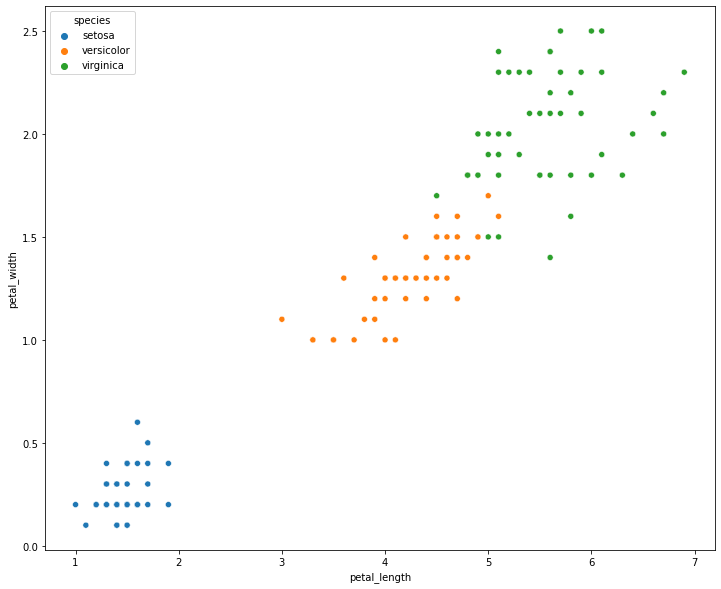

In [15]:
plt.figure(figsize=(12,10))
sns.scatterplot(df['petal_length'],df['petal_width'], hue=df['species'])

Facts:

1a. Petal length and Petal width are highly correlated.\
1b. Sepal length and Petal length are highly correlated.\
1c. Sepal length and Petal width are highly correlated.

# Feature Engineering

In [16]:
df['Petal Area'] = df['petal_length']*df['petal_width']
df['Sepal Area'] = df['sepal_length']*df['sepal_width']

In [17]:
#sns.pairplot(df, hue="species")

We can see that most of the iris flowers can be easily distinguished using the Petal Area and Sepal Area. We can now drop the other tables so as to not confuse the model and to maintain the accuracy of the predictions. And also convert the required ones to numerical form.

In [18]:
ndf = df.drop(columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], axis=1)
ndf

,species,Petal Area,Sepal Area
0,setosa,0.28,17.85
1,setosa,0.28,14.70
2,setosa,0.26,15.04
3,setosa,0.30,14.26
4,setosa,0.28,18.00
...,...,...,...
145,virginica,11.96,20.10
146,virginica,9.50,15.75
147,virginica,10.40,19.50
148,virginica,12.42,21.08


# Model Training and Prediction

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression as LR
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB

In [20]:
x_col = ndf.drop(columns=['species'], axis=1)
y_col = ndf['species']

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x_col, y_col, random_state=0)

In [22]:
#Test and train original values
lm = LR()
lm.fit(x_train, y_train)
preD = lm.predict(x_test)

# Model Evaluation

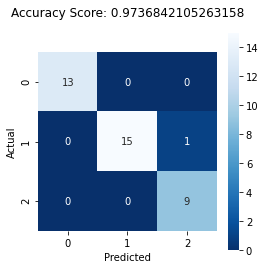

In [23]:
plt.figure(figsize=(4,4))
sns.heatmap(metrics.confusion_matrix(y_test, preD), annot=True, square = True, cmap = 'Blues_r');
plt.ylabel('Actual');
plt.xlabel('Predicted');
all_sample_title = 'Accuracy Score: {0}\n\n'.format(metrics.accuracy_score(y_test, preD))
plt.title(all_sample_title);

In [24]:
print('Classification report for original values:\n')
print(classification_report(y_test, preD))

Classification report for original values:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.94      0.97        16
   virginica       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



We can clearly see that the confusion only exists in differentiating Versicolor from Virginica. Due to this, the ML Model tends to select Virginica instead of Versicolor for a few cases. The confusion matrix and heatmap show that the ML model can accurately tell if the given data is of setosa.

# Predicting after Normalisation

In [25]:
mms = MinMaxScaler()
x_norm = mms.fit_transform(x_col)

In [26]:
x_train_norm, x_test_norm, y_train_norm, y_test_norm = train_test_split(x_norm, y_col, random_state=0)

In [27]:
lm.fit(x_train_norm, y_train_norm)
preD_norm = lm.predict(x_test_norm)

# Model Evaluation

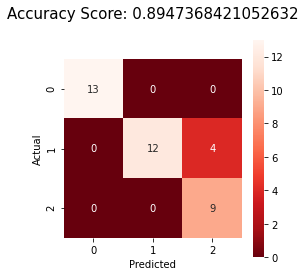

In [28]:
plt.figure(figsize=(4,4))
sns.heatmap(metrics.confusion_matrix(y_test_norm, preD_norm), annot=True, square = True, cmap='Reds_r');
plt.ylabel('Actual');
plt.xlabel('Predicted');
all_sample_title = 'Accuracy Score: {0}\n\n'.format(metrics.accuracy_score(y_test_norm, preD_norm))
plt.title(all_sample_title, size = 15);

In [29]:
print('Classification report for normalised values:\n')
print(classification_report(y_test_norm, preD_norm))

Classification report for normalised values:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.75      0.86        16
   virginica       0.69      1.00      0.82         9

    accuracy                           0.89        38
   macro avg       0.90      0.92      0.89        38
weighted avg       0.93      0.89      0.90        38



# Gaussian Naive Bayes

In [30]:
x_train_GNB, x_test_GNB, y_train_GNB, y_test_GNB = train_test_split(x_col, y_col, random_state=0)
GNB = GaussianNB()
GNB.fit(x_train_GNB, y_train_GNB)

GaussianNB()

In [32]:
GNBPredict = GNB.predict(x_test_GNB)

# Model Evaluation

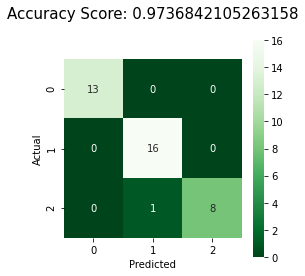

In [33]:
plt.figure(figsize=(4,4))
sns.heatmap(metrics.confusion_matrix(y_test_GNB, GNBPredict), annot=True, square = True, cmap='Greens_r');
plt.ylabel('Actual');
plt.xlabel('Predicted');
all_sample_title = 'Accuracy Score: {0}\n\n'.format(metrics.accuracy_score(y_test_GNB, GNBPredict))
plt.title(all_sample_title, size = 15);

In [34]:
print('Classification report for decision GNB values:\n')
print(classification_report(y_test_GNB, GNBPredict))

Classification report for decision GNB values:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       0.94      1.00      0.97        16
   virginica       1.00      0.89      0.94         9

    accuracy                           0.97        38
   macro avg       0.98      0.96      0.97        38
weighted avg       0.98      0.97      0.97        38

